In [2]:
import numpy as np
import pandas as pd
import json
import string
import re
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('tmdb_5000_movies.csv')


In [4]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [5]:
df=df[['budget','genres','popularity','revenue','vote_count','title','release_date','id','vote_average','runtime','spoken_languages']]

In [6]:
df

,budget,genres,popularity,revenue,vote_count,title,release_date,id,vote_average,runtime,spoken_languages
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",150.437577,2787965087,11800,Avatar,2009-12-10,19995,7.2,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",139.082615,961000000,4500,Pirates of the Caribbean: At World's End,2007-05-19,285,6.9,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",107.376788,880674609,4466,Spectre,2015-10-26,206647,6.3,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",112.312950,1084939099,9106,The Dark Knight Rises,2012-07-16,49026,7.6,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",43.926995,284139100,2124,John Carter,2012-03-07,49529,6.1,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",14.269792,2040920,238,El Mariachi,1992-09-04,9367,6.6,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]"
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",0.642552,0,5,Newlyweds,2011-12-26,72766,5.9,85.0,[]
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",1.444476,0,6,"Signed, Sealed, Delivered",2013-10-13,231617,7.0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4801,0,[],0.857008,0,7,Shanghai Calling,2012-05-03,126186,5.7,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


In [6]:
df.isnull().sum()

budget          0
genres          0
popularity      0
revenue         0
vote_count      0
title           0
release_date    1
id              0
vote_average    0
dtype: int64

In [7]:
df.shape

(4803, 9)

In [8]:
# Function to parse the JSON and extract genre names
def extract_genres_names(genres_data):
    genres = json.loads(genres_data)
    return [genres['name'] for genres in genres]

# Explode the genres column
df['genres'] = df['genres'].apply(extract_genres_names)
df = df.explode('genres')


In [9]:
# Remove duplicate rows based on the "ID" column
df1 = df.drop_duplicates(subset=['id'])

In [10]:
df1

,budget,genres,popularity,revenue,vote_count,title,release_date,id,vote_average
0,237000000,Action,150.437577,2787965087,11800,Avatar,2009-12-10,19995,7.2
1,300000000,Adventure,139.082615,961000000,4500,Pirates of the Caribbean: At World's End,2007-05-19,285,6.9
2,245000000,Action,107.376788,880674609,4466,Spectre,2015-10-26,206647,6.3
3,250000000,Action,112.312950,1084939099,9106,The Dark Knight Rises,2012-07-16,49026,7.6
4,260000000,Action,43.926995,284139100,2124,John Carter,2012-03-07,49529,6.1
...,...,...,...,...,...,...,...,...,...
4798,220000,Action,14.269792,2040920,238,El Mariachi,1992-09-04,9367,6.6
4799,9000,Comedy,0.642552,0,5,Newlyweds,2011-12-26,72766,5.9
4800,0,Comedy,1.444476,0,6,"Signed, Sealed, Delivered",2013-10-13,231617,7.0
4801,0,NaN,0.857008,0,7,Shanghai Calling,2012-05-03,126186,5.7


In [11]:
data= pd.read_csv("tmdb_5000_credits.csv")

In [12]:
data

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [13]:
import ast

def convert(obj): 
    L = []
    for i in ast.literal_eval(obj): 
        L.append(i['name'])
    return L

In [14]:
#From the crew,we are focusing mainly on directors for now
def fetch_director(obj): 
    L = []
    for i in ast.literal_eval(obj): 
        if i ['job'] == "Director":
            L.append(i['name']) 
    return L 

In [15]:
data['Director_name'] = data['crew'].apply(fetch_director) 
data.head()

,movie_id,title,cast,crew,Director_name
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski]
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes]
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan]
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton]


In [16]:
def fetch_director(obj): 
    L = []
    for i in ast.literal_eval(obj): 
        if i ['job'] == "Producer":
            L.append(i['name']) 
    return L 

In [17]:
data['Producer_name'] = data['crew'].apply(fetch_director) 
data.head()

,movie_id,title,cast,crew,Director_name,Producer_name
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]"
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes],"[Barbara Broccoli, Michael G. Wilson]"
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan],"[Charles Roven, Christopher Nolan, Emma Thomas]"
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton],"[Colin Wilson, Jim Morris, Lindsey Collins]"


In [18]:
data

,movie_id,title,cast,crew,Director_name,Producer_name
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]"
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",[Sam Mendes],"[Barbara Broccoli, Michael G. Wilson]"
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",[Christopher Nolan],"[Charles Roven, Christopher Nolan, Emma Thomas]"
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",[Andrew Stanton],"[Colin Wilson, Jim Morris, Lindsey Collins]"
...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",[Robert Rodriguez],"[Robert Rodriguez, Carlos Gallardo]"
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",[Edward Burns],"[Edward Burns, William Rexer, Aaron Lubin]"
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",[Scott Smith],[Harvey Kahn]
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",[Daniel Hsia],[]


In [19]:
data.rename(columns={'movie_id': 'id'}, inplace=True)

In [20]:
merge=pd.merge(data,df,on='id')

In [21]:
merge.head(5)

,id,title_x,cast,crew,Director_name,Producer_name,budget,genres,popularity,revenue,vote_count,title_y,release_date,vote_average
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]",237000000,Action,150.437577,2787965087,11800,Avatar,2009-12-10,7.2
1,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]",237000000,Adventure,150.437577,2787965087,11800,Avatar,2009-12-10,7.2
2,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]",237000000,Fantasy,150.437577,2787965087,11800,Avatar,2009-12-10,7.2
3,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",[James Cameron],"[James Cameron, Jon Landau]",237000000,Science Fiction,150.437577,2787965087,11800,Avatar,2009-12-10,7.2
4,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",[Gore Verbinski],"[Jerry Bruckheimer, Eric McLeod, Chad Oman, Pe...",300000000,Adventure,139.082615,961000000,4500,Pirates of the Caribbean: At World's End,2007-05-19,6.9


In [22]:
merge.drop(columns = ['cast','crew'],axis=1,inplace=True)

In [23]:
merge = merge.drop_duplicates(subset=['id'])

In [24]:
merge['Producer_name'] = merge['Producer_name'].apply(lambda x: x[0] if x else '')
merge['Director_name'] = merge['Director_name'].apply(lambda x: x[0] if x else 0)

In [25]:
merge

,id,title_x,Director_name,Producer_name,budget,genres,popularity,revenue,vote_count,title_y,release_date,vote_average
0,19995,Avatar,James Cameron,James Cameron,237000000,Action,150.437577,2787965087,11800,Avatar,2009-12-10,7.2
4,285,Pirates of the Caribbean: At World's End,Gore Verbinski,Jerry Bruckheimer,300000000,Adventure,139.082615,961000000,4500,Pirates of the Caribbean: At World's End,2007-05-19,6.9
7,206647,Spectre,Sam Mendes,Barbara Broccoli,245000000,Action,107.376788,880674609,4466,Spectre,2015-10-26,6.3
10,49026,The Dark Knight Rises,Christopher Nolan,Charles Roven,250000000,Action,112.312950,1084939099,9106,The Dark Knight Rises,2012-07-16,7.6
14,49529,John Carter,Andrew Stanton,Colin Wilson,260000000,Action,43.926995,284139100,2124,John Carter,2012-03-07,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...
12177,9367,El Mariachi,Robert Rodriguez,Robert Rodriguez,220000,Action,14.269792,2040920,238,El Mariachi,1992-09-04,6.6
12180,72766,Newlyweds,Edward Burns,Edward Burns,9000,Comedy,0.642552,0,5,Newlyweds,2011-12-26,5.9
12182,231617,"Signed, Sealed, Delivered",Scott Smith,Harvey Kahn,0,Comedy,1.444476,0,6,"Signed, Sealed, Delivered",2013-10-13,7.0
12186,126186,Shanghai Calling,Daniel Hsia,,0,NaN,0.857008,0,7,Shanghai Calling,2012-05-03,5.7


In [26]:
merge['Producer_name'] = merge['Producer_name'].fillna(0)

In [27]:
merge['Producer_name'] = merge['Producer_name'].replace('', 'unknown')


In [28]:
merge.drop(columns = ['title_y'],axis=1,inplace=True)

In [29]:
merge.rename(columns={'title_x': 'movie_name'}, inplace=True)

In [30]:
merge

,id,movie_name,Director_name,Producer_name,budget,genres,popularity,revenue,vote_count,release_date,vote_average
0,19995,Avatar,James Cameron,James Cameron,237000000,Action,150.437577,2787965087,11800,2009-12-10,7.2
4,285,Pirates of the Caribbean: At World's End,Gore Verbinski,Jerry Bruckheimer,300000000,Adventure,139.082615,961000000,4500,2007-05-19,6.9
7,206647,Spectre,Sam Mendes,Barbara Broccoli,245000000,Action,107.376788,880674609,4466,2015-10-26,6.3
10,49026,The Dark Knight Rises,Christopher Nolan,Charles Roven,250000000,Action,112.312950,1084939099,9106,2012-07-16,7.6
14,49529,John Carter,Andrew Stanton,Colin Wilson,260000000,Action,43.926995,284139100,2124,2012-03-07,6.1
...,...,...,...,...,...,...,...,...,...,...,...
12177,9367,El Mariachi,Robert Rodriguez,Robert Rodriguez,220000,Action,14.269792,2040920,238,1992-09-04,6.6
12180,72766,Newlyweds,Edward Burns,Edward Burns,9000,Comedy,0.642552,0,5,2011-12-26,5.9
12182,231617,"Signed, Sealed, Delivered",Scott Smith,Harvey Kahn,0,Comedy,1.444476,0,6,2013-10-13,7.0
12186,126186,Shanghai Calling,Daniel Hsia,unknown,0,NaN,0.857008,0,7,2012-05-03,5.7


In [31]:
merge.to_csv('new_movie_new_data.csv')

In [32]:
df=pd.read_csv('new_movie_new_data.csv')

In [33]:
df


,Unnamed: 0,id,movie_name,Director_name,Producer_name,budget,genres,popularity,revenue,vote_count,release_date,vote_average
0,0,19995,Avatar,James Cameron,James Cameron,237000000,Action,150.437577,2787965087,11800,2009-12-10,7.2
1,4,285,Pirates of the Caribbean: At World's End,Gore Verbinski,Jerry Bruckheimer,300000000,Adventure,139.082615,961000000,4500,2007-05-19,6.9
2,7,206647,Spectre,Sam Mendes,Barbara Broccoli,245000000,Action,107.376788,880674609,4466,2015-10-26,6.3
3,10,49026,The Dark Knight Rises,Christopher Nolan,Charles Roven,250000000,Action,112.312950,1084939099,9106,2012-07-16,7.6
4,14,49529,John Carter,Andrew Stanton,Colin Wilson,260000000,Action,43.926995,284139100,2124,2012-03-07,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...
4798,12177,9367,El Mariachi,Robert Rodriguez,Robert Rodriguez,220000,Action,14.269792,2040920,238,1992-09-04,6.6
4799,12180,72766,Newlyweds,Edward Burns,Edward Burns,9000,Comedy,0.642552,0,5,2011-12-26,5.9
4800,12182,231617,"Signed, Sealed, Delivered",Scott Smith,Harvey Kahn,0,Comedy,1.444476,0,6,2013-10-13,7.0
4801,12186,126186,Shanghai Calling,Daniel Hsia,unknown,0,NaN,0.857008,0,7,2012-05-03,5.7


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


In [35]:
#What are the top 5 movies with the highest 'vote_average'?

In [36]:
top_5_movies = merge.sort_values(by='vote_average', ascending=False).head(5)

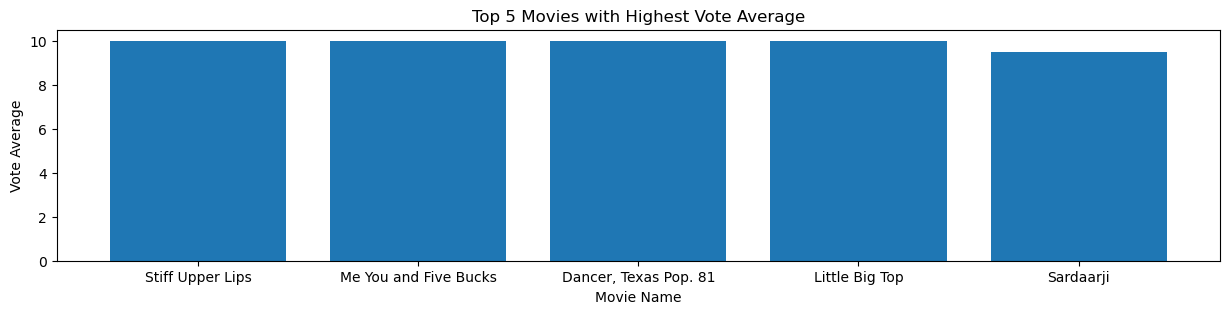

In [37]:
plt.figure(figsize=(15, 3))
plt.bar(top_5_movies['movie_name'], top_5_movies['vote_average'])
plt.title('Top 5 Movies with Highest Vote Average')
plt.xlabel('Movie Name')
plt.ylabel('Vote Average')
plt.show()


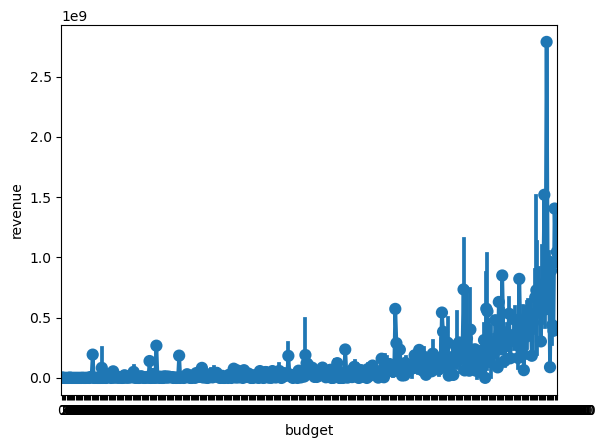

In [38]:
#Plot of budget and revenue
sns.pointplot(x="budget", y="revenue", data=merge);


In [39]:
#Which genres have the highest total revenue? 

In [40]:
genre_revenue = merge.groupby('genres')['revenue'].sum().reset_index()
genre_revenue = genre_revenue.sort_values(by='revenue', ascending=False)

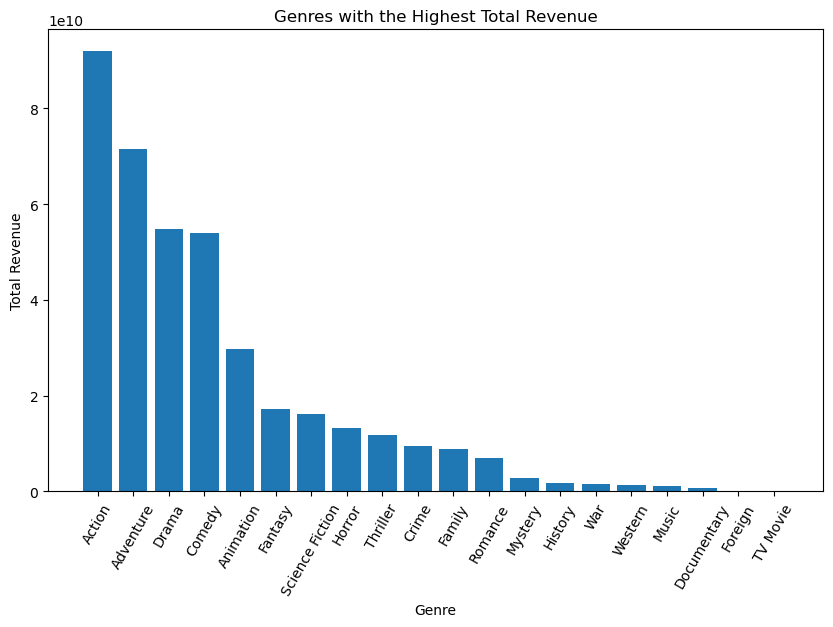

In [41]:
plt.figure(figsize=(10, 6))
plt.bar(genre_revenue['genres'], genre_revenue['revenue'])
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.title('Genres with the Highest Total Revenue')
plt.xticks(rotation=60)
plt.show()

In [42]:
#How is revenue distributed across different movie genres?

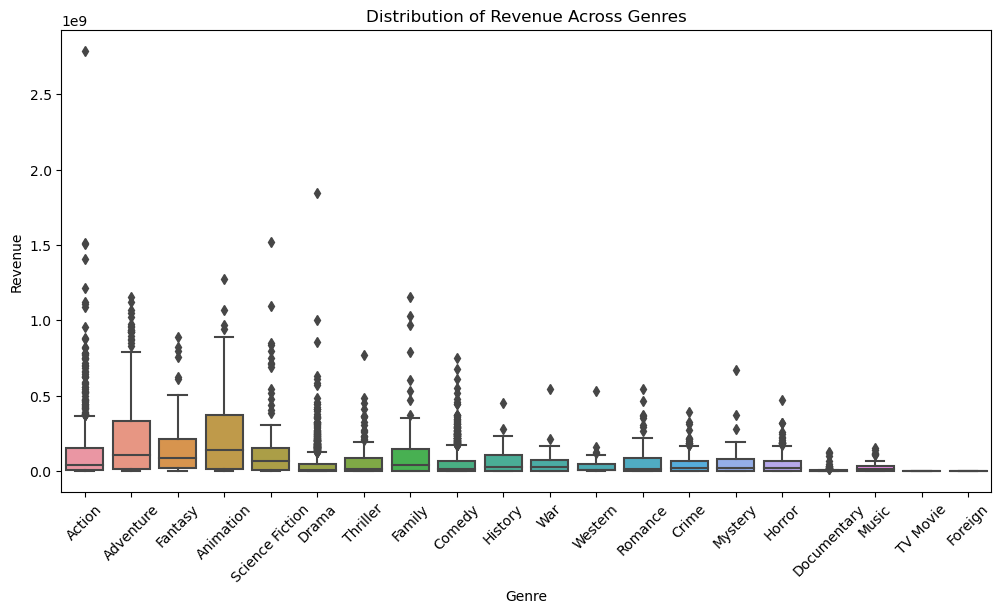

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='revenue', data=merge)
plt.title('Distribution of Revenue Across Genres')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

In [44]:
#How has the average vote_average changed over the years?

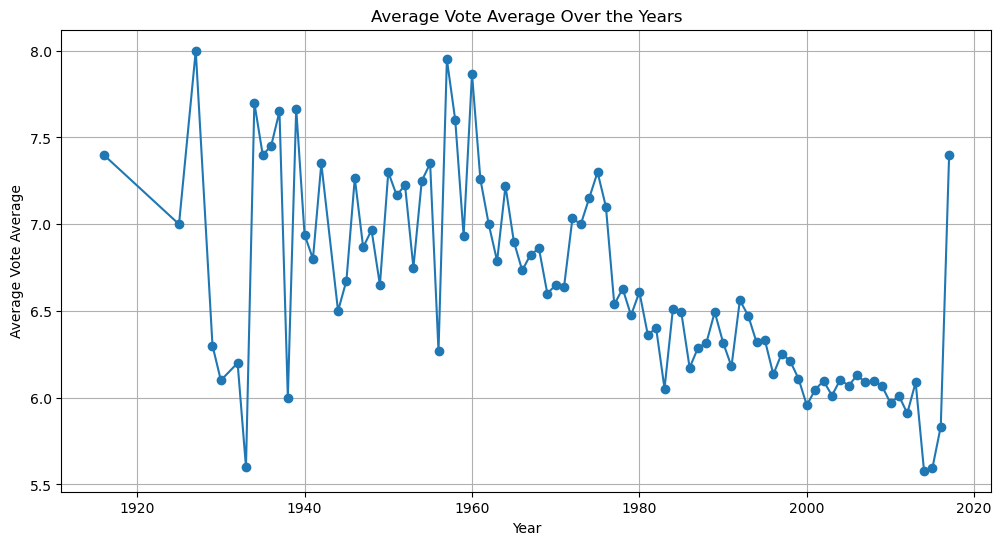

In [45]:
merge['release_date'] = pd.to_datetime(merge['release_date'])
merge['year'] = merge['release_date'].dt.year

grouped = merge.groupby('year')['vote_average'].mean()

plt.figure(figsize=(12, 6))
plt.plot(grouped.index, grouped.values, marker='o', linestyle='-')
plt.title('Average Vote Average Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Vote Average')
plt.grid(True)
plt.show()


In [46]:
merge["year"]=pd.to_datetime(merge["year"], format= "%Y-%m-%d")

In [47]:
#What is the distribution of budget for different movie genres?

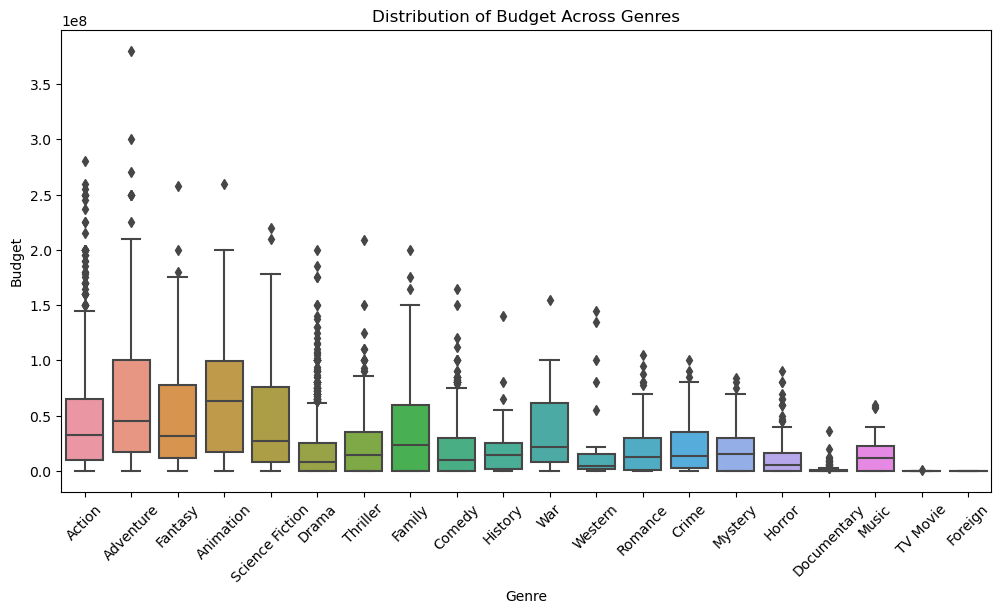

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genres', y='budget', data=merge)
plt.title('Distribution of Budget Across Genres')
plt.xlabel('Genre')
plt.ylabel('Budget')
plt.xticks(rotation=45)
plt.show()


In [49]:
# time series analysis

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [51]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 12187
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             4803 non-null   int64         
 1   movie_name     4803 non-null   object        
 2   Director_name  4803 non-null   object        
 3   Producer_name  4803 non-null   object        
 4   budget         4803 non-null   int64         
 5   genres         4775 non-null   object        
 6   popularity     4803 non-null   float64       
 7   revenue        4803 non-null   int64         
 8   vote_count     4803 non-null   int64         
 9   release_date   4802 non-null   datetime64[ns]
 10  vote_average   4803 non-null   float64       
 11  year           4802 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(4)
memory usage: 487.8+ KB


In [52]:
merge

,id,movie_name,Director_name,Producer_name,budget,genres,popularity,revenue,vote_count,release_date,vote_average,year
0,19995,Avatar,James Cameron,James Cameron,237000000,Action,150.437577,2787965087,11800,2009-12-10,7.2,1970-01-01 00:00:00.000002009
4,285,Pirates of the Caribbean: At World's End,Gore Verbinski,Jerry Bruckheimer,300000000,Adventure,139.082615,961000000,4500,2007-05-19,6.9,1970-01-01 00:00:00.000002007
7,206647,Spectre,Sam Mendes,Barbara Broccoli,245000000,Action,107.376788,880674609,4466,2015-10-26,6.3,1970-01-01 00:00:00.000002015
10,49026,The Dark Knight Rises,Christopher Nolan,Charles Roven,250000000,Action,112.312950,1084939099,9106,2012-07-16,7.6,1970-01-01 00:00:00.000002012
14,49529,John Carter,Andrew Stanton,Colin Wilson,260000000,Action,43.926995,284139100,2124,2012-03-07,6.1,1970-01-01 00:00:00.000002012
...,...,...,...,...,...,...,...,...,...,...,...,...
12177,9367,El Mariachi,Robert Rodriguez,Robert Rodriguez,220000,Action,14.269792,2040920,238,1992-09-04,6.6,1970-01-01 00:00:00.000001992
12180,72766,Newlyweds,Edward Burns,Edward Burns,9000,Comedy,0.642552,0,5,2011-12-26,5.9,1970-01-01 00:00:00.000002011
12182,231617,"Signed, Sealed, Delivered",Scott Smith,Harvey Kahn,0,Comedy,1.444476,0,6,2013-10-13,7.0,1970-01-01 00:00:00.000002013
12186,126186,Shanghai Calling,Daniel Hsia,unknown,0,NaN,0.857008,0,7,2012-05-03,5.7,1970-01-01 00:00:00.000002012


In [53]:
merge.shape

(4803, 12)

In [54]:
merge.isnull().sum()

id                0
movie_name        0
Director_name     0
Producer_name     0
budget            0
genres           28
popularity        0
revenue           0
vote_count        0
release_date      1
vote_average      0
year              1
dtype: int64

In [55]:
merge.dropna(inplace = True)

In [56]:
merge.isnull().sum()

id               0
movie_name       0
Director_name    0
Producer_name    0
budget           0
genres           0
popularity       0
revenue          0
vote_count       0
release_date     0
vote_average     0
year             0
dtype: int64

In [57]:
merge['release_date'] = pd.to_datetime(merge['release_date'])

In [58]:
merge.sort_values(by = ['release_date'],inplace = True)

In [59]:
merge

,id,movie_name,Director_name,Producer_name,budget,genres,popularity,revenue,vote_count,release_date,vote_average,year
11783,3059,Intolerance,D.W. Griffith,D.W. Griffith,385907,Drama,3.232447,8394751,60,1916-09-04,7.4,1970-01-01 00:00:00.000001916
11911,3060,The Big Parade,King Vidor,Irving Thalberg,245000,Drama,0.785744,22000000,21,1925-11-05,7.0,1970-01-01 00:00:00.000001925
7313,19,Metropolis,Fritz Lang,Erich Pommer,92620000,Drama,32.351527,650422,657,1927-01-10,8.0,1970-01-01 00:00:00.000001927
11513,905,Pandora's Box,G.W. Pabst,Seymour Nebenzal,0,Drama,1.824184,0,45,1929-01-30,7.6,1970-01-01 00:00:00.000001929
11785,65203,The Broadway Melody,Harry Beaumont,Irving Thalberg,379000,Drama,0.968865,4358000,19,1929-02-08,5.0,1970-01-01 00:00:00.000001929
...,...,...,...,...,...,...,...,...,...,...,...,...
8814,385736,Kicks,Justin Tipping,Joshua Astrachan,0,Adventure,3.467923,0,18,2016-09-09,7.5,1970-01-01 00:00:00.000002016
12024,339408,The Birth of a Nation,Nate Parker,Preston L. Holmes,8500000,Drama,9.452808,15861566,178,2016-09-09,6.5,1970-01-01 00:00:00.000002016
8951,374461,Mr. Church,Bruce Beresford,Mark Canton,8000000,Drama,7.828459,0,129,2016-09-16,7.0,1970-01-01 00:00:00.000002016
9205,325373,Two Lovers and a Bear,Kim Nguyen,unknown,0,Drama,3.139294,0,27,2016-10-02,6.8,1970-01-01 00:00:00.000002016


In [60]:
merge = merge.set_index('release_date')
merge

,id,movie_name,Director_name,Producer_name,budget,genres,popularity,revenue,vote_count,vote_average,year
release_date,,,,,,,,,,,
1916-09-04,3059,Intolerance,D.W. Griffith,D.W. Griffith,385907,Drama,3.232447,8394751,60,7.4,1970-01-01 00:00:00.000001916
1925-11-05,3060,The Big Parade,King Vidor,Irving Thalberg,245000,Drama,0.785744,22000000,21,7.0,1970-01-01 00:00:00.000001925
1927-01-10,19,Metropolis,Fritz Lang,Erich Pommer,92620000,Drama,32.351527,650422,657,8.0,1970-01-01 00:00:00.000001927
1929-01-30,905,Pandora's Box,G.W. Pabst,Seymour Nebenzal,0,Drama,1.824184,0,45,7.6,1970-01-01 00:00:00.000001929
1929-02-08,65203,The Broadway Melody,Harry Beaumont,Irving Thalberg,379000,Drama,0.968865,4358000,19,5.0,1970-01-01 00:00:00.000001929
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09,385736,Kicks,Justin Tipping,Joshua Astrachan,0,Adventure,3.467923,0,18,7.5,1970-01-01 00:00:00.000002016
2016-09-09,339408,The Birth of a Nation,Nate Parker,Preston L. Holmes,8500000,Drama,9.452808,15861566,178,6.5,1970-01-01 00:00:00.000002016
2016-09-16,374461,Mr. Church,Bruce Beresford,Mark Canton,8000000,Drama,7.828459,0,129,7.0,1970-01-01 00:00:00.000002016


In [61]:
merge['genres'].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: genres, dtype: int64

In [62]:
merge1= merge[merge['genres']== 'Family']

In [63]:
merge1

,id,movie_name,Director_name,Producer_name,budget,genres,popularity,revenue,vote_count,vote_average,year
release_date,,,,,,,,,,,
1966-07-30,2661,Batman,Leslie H. Martinson,William Dozier,1377800,Family,9.815394,0,203,6.1,1970-01-01 00:00:00.000001966
1971-06-29,252,Willy Wonka & the Chocolate Factory,Mel Stuart,Stan Margulies,3000000,Family,23.981601,4000000,798,7.4,1970-01-01 00:00:00.000001971
1981-07-13,36819,Time Bandits,Terry Gilliam,Terry Gilliam,5000000,Family,14.779537,42365581,249,6.6,1970-01-01 00:00:00.000001981
1982-03-02,24266,The Man from Snowy River,George T. Miller,unknown,3500000,Family,3.656491,20659423,37,6.8,1970-01-01 00:00:00.000001982
1987-11-27,12154,Three Men and a Baby,Leonard Nimoy,Ted Field,0,Family,12.335827,0,253,5.8,1970-01-01 00:00:00.000001987
1993-11-24,73191,The Nutcracker,Emile Ardolino,unknown,19000000,Family,0.068228,2119994,5,5.6,1970-01-01 00:00:00.000001993
1994-06-23,8587,The Lion King,Roger Allers,unknown,45000000,Family,90.457886,788241776,5376,8.0,1970-01-01 00:00:00.000001994
1996-11-15,9279,Jingle All the Way,Brian Levant,Chris Columbus,60000000,Family,22.501041,129832389,575,5.5,1970-01-01 00:00:00.000001996
1998-01-01,17644,Barney's Great Adventure,Steve Gomer,unknown,0,Family,0.722911,0,8,2.9,1970-01-01 00:00:00.000001998


In [64]:
merge1 = merge1[['vote_count','vote_average']]
merge1

,vote_count,vote_average
release_date,,
1966-07-30,203,6.1
1971-06-29,798,7.4
1981-07-13,249,6.6
1982-03-02,37,6.8
1987-11-27,253,5.8
1993-11-24,5,5.6
1994-06-23,5376,8.0
1996-11-15,575,5.5
1998-01-01,8,2.9


In [65]:
merge1 = merge1.copy(deep=True)
merge1 =merge1.drop(merge1.columns.difference(['vote_count','vote_average','release_date']), 1)

In [66]:
votes =(merge1.groupby('release_date', sort=True).mean())

In [67]:
votes.head()

,vote_count,vote_average
release_date,,
1966-07-30,203.0,6.1
1971-06-29,798.0,7.4
1981-07-13,249.0,6.6
1982-03-02,37.0,6.8
1987-11-27,253.0,5.8


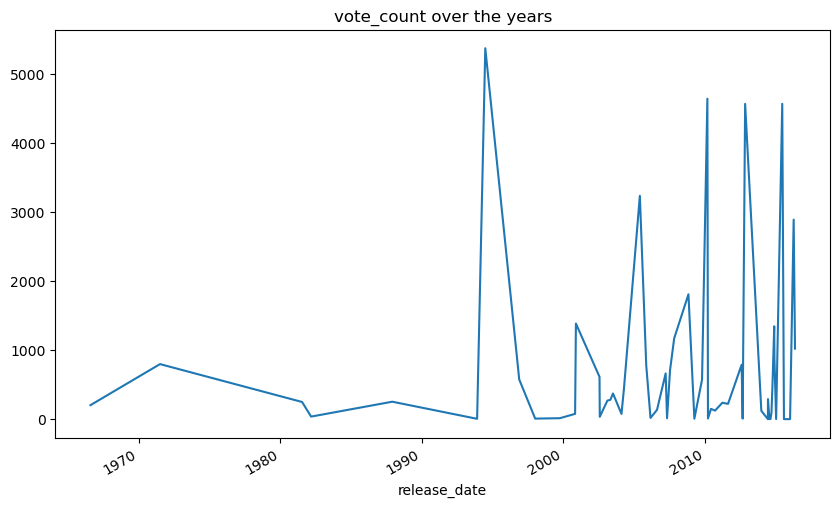

In [68]:
votes['vote_count'].plot(figsize=(10,6),title='vote_count over the years');

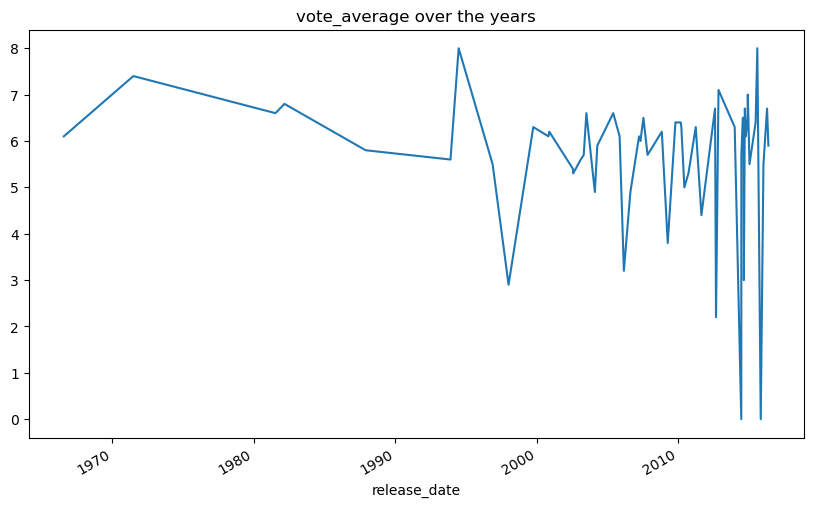

In [69]:
votes['vote_average'].plot(figsize=(10,6),title='vote_average over the years');

# conclusion

#A dataset of 5,000 uncleaned rows and columns cleaned. Considering the fact that we shall be cleaning the data and removing null values, the size of the data would reduce signifcantly.

#fill the value with 0 and unknown 